# White Blood Cell Classification Model

### There are 2 models for this project.
1. Model 1 - Created manually
2. Model 2 - Using data augmentation and tranfer learning (VGG16)

In [32]:
# Import all the important libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [33]:
# import tenserflow and keras

import tensorflow as tf
from tensorflow import keras

In [34]:
# Path of the directory where image dataset is stored

dataset_dir = r"C:\Users\Hrithik\Desktop\All Desktop Apps and Folder\Important Folders\Data Science Projects (Outside)\Medprime Assignment\task\wbc"

### Read the Images from the directory and split into Train and Validation

In [35]:
# import Image Data Generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
# Generate batches of Tensor image data and split into train (80%) and validation set (20%)
# We take batch size of 4. Class mode is categorical as we have 9 different classes
# All the images are of size 256x256

dataset_datagen = ImageDataGenerator(rescale=1.0/255, validation_split = 0.2)

train_generator = dataset_datagen.flow_from_directory(
        dataset_dir,
        batch_size=4,
        target_size=(256, 256),
        subset="training",
        class_mode='categorical')

validation_generator = dataset_datagen.flow_from_directory(
        dataset_dir,
        batch_size=4,
        target_size=(256, 256),
        subset="validation",
        class_mode='categorical')

Found 425 images belonging to 9 classes.
Found 103 images belonging to 9 classes.


In [37]:
# Check the classes

train_generator.class_indices

{'bands': 0,
 'basophils': 1,
 'blasts': 2,
 'eosinophils': 3,
 'lymphocytes': 4,
 'metamyelocytes': 5,
 'monocytes': 6,
 'myelocytes': 7,
 'neutrophils': 8}

In [38]:
# Check the validation dataset

validation_generator.classes

array([0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

In [39]:
# Split train dataset into Image (X) and Labels (Y)

imgs, labels = next(train_generator)

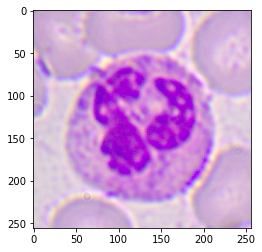

In [40]:
# Print sample images from the train dataset

plt.imshow(imgs[0])
plt.show()

## MODEL 1

In [41]:
# import libraries for making the model

from tensorflow.keras import layers
from tensorflow.keras import models

In [42]:
# Creating a CNN model number 1. This all the layers are made manually. In model 2 we will use base layer of VGG16

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(9, activation="softmax"))

# Softmax layer used because we want categorical output which can have 9 diferrent values

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [44]:
# Compile the model. Import the optimizer library
# Loss function that we are using here is categorical crossentropy
# Metrics that we are using is Accuracy
# Learning rate for optimizer is 2e-5

from tensorflow.keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

C:\Users\Hrithik\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [45]:
model_history = model.fit(train_generator, epochs=30,batch_size= 4,
                    validation_data= validation_generator)

Epoch 1/30
107/107 [==============================] - 62s 572ms/step - loss: 1.5767 - acc: 0.3953 - val_loss: 1.4319 - val_acc: 0.7184
Epoch 2/30
107/107 [==============================] - 63s 590ms/step - loss: 1.4989 - acc: 0.4800 - val_loss: 1.3782 - val_acc: 0.4660
Epoch 3/30
107/107 [==============================] - 57s 534ms/step - loss: 1.4313 - acc: 0.5506 - val_loss: 1.2720 - val_acc: 0.6893
Epoch 4/30
107/107 [==============================] - 56s 527ms/step - loss: 1.3333 - acc: 0.6400 - val_loss: 1.1575 - val_acc: 0.7087
Epoch 5/30
107/107 [==============================] - 57s 529ms/step - loss: 1.2178 - acc: 0.6541 - val_loss: 1.0962 - val_acc: 0.6990
Epoch 6/30
107/107 [==============================] - 57s 529ms/step - loss: 1.1390 - acc: 0.6729 - val_loss: 1.0774 - val_acc: 0.7184
Epoch 7/30
107/107 [==============================] - 59s 547ms/step - loss: 1.0685 - acc: 0.6800 - val_loss: 1.0416 - val_acc: 0.7184
Epoch 8/30
107/107 [==============================] - 5

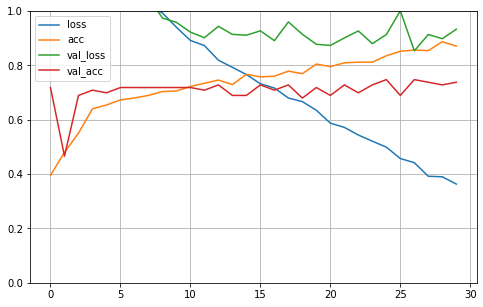

In [46]:
# Make plot for accuracy and loss for Train and Validation

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Read Image for Image Classification (Model 1)

In [80]:
# Import the image dataset which we want to classify

classify_dir = r"C:\Users\Hrithik\Desktop\All Desktop Apps and Folder\Important Folders\Data Science Projects (Outside)\Medprime Assignment\task\classify-images"

In [81]:
# import load image library to read all the images one by one

from keras.preprocessing.image import img_to_array, load_img

In [83]:
# Import cv2, os library to read the images from the folder

import cv2
import os

# Function to read and resize the images so that we can input it to the model

def load_images_from_folder(folder):
    images = []
    
    for filename in os.listdir(folder):
        
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img = img_to_array(img)
            img =np.expand_dims(img, axis=0)
            images.append(img)
            
    return images

In [84]:
# Call the function and store all the images

classify_images = load_images_from_folder(classify_dir)

In [85]:
# Check shape of images

classify_images[0].shape

(1, 256, 256, 3)

In [86]:
# Check length of images

len(classify_images)

59

### Predict for 59 images using Model 1

In [93]:
# Predict the image categories for all 59 images

final_prediction = pd.DataFrame(columns = ["Image name", "Prediction"])

for i in range(len(classify_images)):
    
    preds = model.predict(classify_images[i])
    final_prediction = final_prediction.append({'Image name' : str(i+1)+ ".jpg", 'Prediction' : preds}, ignore_index = True)

In [95]:
# train_generator class indices

train_generator.class_indices

{'bands': 0,
 'basophils': 1,
 'blasts': 2,
 'eosinophils': 3,
 'lymphocytes': 4,
 'metamyelocytes': 5,
 'monocytes': 6,
 'myelocytes': 7,
 'neutrophils': 8}

In [97]:
# Print the predicted Dataframe
# Example: We can see that for 1st image it shows "1st" for 8th class ie, "neutrophils"
# Example: We can see that for 1st image it shows "20th" for 4th class ie, "lymphocytes"

final_prediction

,Image name,Prediction
0,1.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]"
1,2.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]]"
2,3.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]"
3,4.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]"
4,5.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]"
5,6.jpg,"[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]]"
6,7.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]"
7,8.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.493278e..."
8,9.jpg,"[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]]"
9,10.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]"


In [98]:
# Save the model as model_1

model.save("model_1.h5")

In [103]:
# delete model to free up space

from tensorflow.keras import backend as K 

K.clear_session()
del model

## CREATE MODEL 2 USING DATA AUGMENTATION AND TRANSFER LEARNING

In [104]:
# We will create more images from the present images by using data augmentation

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

train_generator = dataset_datagen.flow_from_directory(
        dataset_dir,
        batch_size=4,
        target_size=(256, 256),
        subset="training",
        class_mode='categorical')

validation_generator = dataset_datagen.flow_from_directory(
        dataset_dir,
        batch_size=4,
        target_size=(256, 256),
        subset="validation",
        class_mode='categorical')

Found 425 images belonging to 9 classes.
Found 103 images belonging to 9 classes.


## MODEL 2 (Using VGG16 base)

In [105]:
# Import VGG16 base

from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(256, 256, 3))

In [106]:
# Add top layer to the base manually

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(9, activation='softmax'))

In [107]:
# model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dense_1 (Dense)             (None, 9)                 2313      
                                                                 
Total params: 23,105,865
Trainable params: 23,105,865
Non-trainable params: 0
_________________________________________________________________


In [109]:
# import optimizer and compile the model

from tensorflow.keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

In [110]:
# train the model

history = model.fit_generator(
      train_generator,
      steps_per_epoch=4,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=2)

<ipython-input-110-1be3102a096a>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
4/4 [==============================] - 17s 4s/step - loss: 2.5994 - acc: 0.1250 - val_loss: 1.7654 - val_acc: 0.5000
Epoch 2/30
4/4 [==============================] - 15s 4s/step - loss: 2.2551 - acc: 0.1875 - val_loss: 1.4521 - val_acc: 0.5000
Epoch 3/30
4/4 [==============================] - 16s 4s/step - loss: 1.4936 - acc: 0.4375 - val_loss: 1.2319 - val_acc: 0.3750
Epoch 4/30
4/4 [==============================] - 17s 4s/step - loss: 1.3643 - acc: 0.6250 - val_loss: 1.2415 - val_acc: 0.7500
Epoch 5/30
4/4 [==============================] - 17s 4s/step - loss: 0.9211 - acc: 0.8125 - val_loss: 2.1227 - val_acc: 0.1250
Epoch 6/30
4/4 [==============================] - 17s 4s/step - loss: 1.8896 - acc: 0.4375 - val_loss: 1.0381 - val_acc: 0.7500
Epoch 7/30
4/4 [==============================] - 17s 4s/step - loss: 1.7413 - acc: 0.5000 - val_loss: 1.3255 - val_acc: 0.6250
Epoch 8/30
4/4 [==============================] - 17s 4s/step - loss: 1.2650 - acc: 0.6250 - val_loss: 0

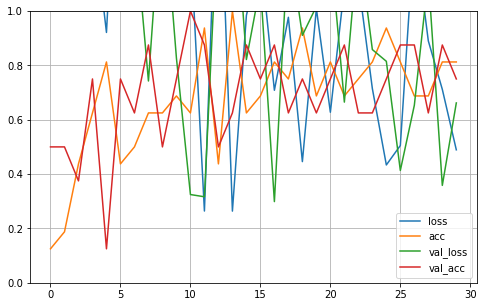

In [111]:
# Make plot for accuracy and loss for Train and Validation for Model 2

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### The lines are still not flattened out. We can run our model once again for 30 epochs to train our model better

In [112]:
# train the model again

history = model.fit_generator(
      train_generator,
      steps_per_epoch=4,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=2)

<ipython-input-112-65d535f27a9a>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
4/4 [==============================] - 15s 4s/step - loss: 0.5325 - acc: 0.8750 - val_loss: 0.2649 - val_acc: 0.8750
Epoch 2/30
4/4 [==============================] - 15s 4s/step - loss: 0.3384 - acc: 0.8750 - val_loss: 1.5923 - val_acc: 0.6250
Epoch 3/30
4/4 [==============================] - 17s 4s/step - loss: 1.3921 - acc: 0.7500 - val_loss: 0.7466 - val_acc: 0.7500
Epoch 4/30
4/4 [==============================] - 17s 4s/step - loss: 0.7613 - acc: 0.8125 - val_loss: 0.3099 - val_acc: 1.0000
Epoch 5/30
4/4 [==============================] - 17s 4s/step - loss: 0.6590 - acc: 0.7500 - val_loss: 0.3931 - val_acc: 1.0000
Epoch 6/30
4/4 [==============================] - 17s 4s/step - loss: 0.8466 - acc: 0.8125 - val_loss: 0.8731 - val_acc: 0.8750
Epoch 7/30
4/4 [==============================] - 17s 4s/step - loss: 0.7016 - acc: 0.8125 - val_loss: 0.3468 - val_acc: 1.0000
Epoch 8/30
4/4 [==============================] - 17s 4s/step - loss: 0.6197 - acc: 0.8125 - val_loss: 0

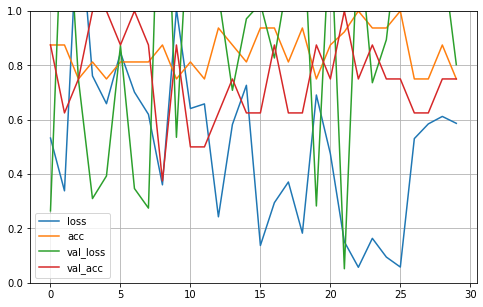

In [113]:
# Make plot for accuracy and loss for Train and Validation for Model 2

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Predict the images using Model 2

In [114]:
final_prediction = pd.DataFrame(columns = ["Image name", "Prediction"])

for i in range(len(classify_images)):
    
    preds = model.predict(classify_images[i])
    final_prediction = final_prediction.append({'Image name' : str(i+1)+ ".jpg", 'Prediction' : preds}, ignore_index = True)

In [116]:
train_generator.class_indices

{'bands': 0,
 'basophils': 1,
 'blasts': 2,
 'eosinophils': 3,
 'lymphocytes': 4,
 'metamyelocytes': 5,
 'monocytes': 6,
 'myelocytes': 7,
 'neutrophils': 8}

In [115]:
final_prediction

,Image name,Prediction
0,1.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]"
1,2.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]]"
2,3.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]"
3,4.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]"
4,5.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]"
5,6.jpg,"[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]]"
6,7.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]"
7,8.jpg,"[[2.4140234e-34, 0.0, 2.2175614e-38, 1.5345754..."
8,9.jpg,"[[0.9999715, 0.0, 0.0, 3.7704856e-30, 2.190984..."
9,10.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]"


In [117]:
# Save the model as model_1

model.save("model_2.h5")

In [118]:
# delete model to free up space

from tensorflow.keras import backend as K 

K.clear_session()
del model